In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import tensorflow as tf
from tensorflow import keras
import keras.models

## Uploading data

In [341]:
w10_cpu=pd.read_csv('w_10_cpu_data.csv')
w10_net=pd.read_csv('w_10_net_data.csv')
w7_cpu=pd.read_csv('w_7_cpu_data.csv')
w7_net=pd.read_csv('w_7_net_data.csv')

## W_10_CPU_DATA

In [342]:
w10_cpu.head()

,ts,Processor_pct_DPC_Time,Processor_pct_Privileged_Time,Process_pct_Privileged_Time,Process_Thread_Count,Processor_pct_Processor_time
0,1554206309,0.078240397,5.163866186,77.61447359,789,66.2001486
1,1554206319,0.078130243,7.109852142,80.94293208,787,66.24773489
2,1554206329,0.233644366,20.87223003,105.1399647,788,66.90038148
3,1554206339,0.313483401,31.74019431,101.5686218,786,79.54520811
4,1554206349,0.703093958,40.85757114,111.4013316,800,82.73513724


In [343]:
w10_cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ts                             24871 non-null  int64 
 1   Processor_pct_DPC_Time         24871 non-null  object
 2   Processor_pct_Privileged_Time  24871 non-null  object
 3   Process_pct_Privileged_Time    24871 non-null  object
 4   Process_Thread_Count           24871 non-null  int64 
 5   Processor_pct_Processor_time   24871 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [344]:
w10_cpu.describe()

,ts,Process_Thread_Count
count,2.487100e+04,24871.000000
mean,1.554888e+09,1179.009811
std,8.773454e+05,287.418078
min,1.554192e+09,703.000000
25%,1.554260e+09,978.000000
50%,1.554322e+09,1033.000000
75%,1.556048e+09,1510.000000
max,1.556548e+09,2290.000000


In [345]:
dict=pd.DataFrame(w10_cpu.dtypes,columns=['Data types'])
dict['null']=w10_cpu.isnull().sum()
dict['unique vals']=w10_cpu.nunique()
dict['count']=w10_cpu.count()
dict

,Data types,null,unique vals,count
ts,int64,0,24871,24871
Processor_pct_DPC_Time,object,0,13016,24871
Processor_pct_Privileged_Time,object,0,24399,24871
Process_pct_Privileged_Time,object,0,24797,24871
Process_Thread_Count,int64,0,1161,24871
Processor_pct_Processor_time,object,0,24733,24871


In [346]:
#changing data types from stirng to float
w10_cpu['Processor_pct_DPC_Time'] =pd.to_numeric(w10_cpu['Processor_pct_DPC_Time'],errors='coerce')
w10_cpu['Processor_pct_Privileged_Time'] =pd.to_numeric(w10_cpu['Processor_pct_Privileged_Time'],errors='coerce')
w10_cpu['Process_pct_Privileged_Time'] =pd.to_numeric(w10_cpu['Process_pct_Privileged_Time'],errors='coerce')
w10_cpu['Processor_pct_Processor_time'] =pd.to_numeric(w10_cpu['Processor_pct_Processor_time'],errors='coerce')

In [347]:
w10_cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ts                             24871 non-null  int64  
 1   Processor_pct_DPC_Time         24862 non-null  float64
 2   Processor_pct_Privileged_Time  24862 non-null  float64
 3   Process_pct_Privileged_Time    24839 non-null  float64
 4   Process_Thread_Count           24871 non-null  int64  
 5   Processor_pct_Processor_time   24862 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


In [348]:
w10_cpu.dropna(axis=0,inplace=True)

In [349]:
X=w10_cpu.iloc[:,:-1]
y=w10_cpu['Processor_pct_Processor_time']

In [350]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [351]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [352]:
import tensorflow as tf
from tensorflow import keras
import keras.models

In [353]:
X_train.shape

(17387, 5)

In [358]:
model=keras.Sequential([keras.layers.Dense(100,input_dim=5,activation='relu'),
                         keras.layers.Dense(80,activation='relu'),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(40,activation='relu'),
                         keras.layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [359]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 100)               600       
                                                                 
 dense_74 (Dense)            (None, 80)                8080      
                                                                 
 dense_75 (Dense)            (None, 60)                4860      
                                                                 
 dense_76 (Dense)            (None, 40)                2440      
                                                                 
 dense_77 (Dense)            (None, 1)                 41        
                                                                 
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
_________________________________________________________________


In [360]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
435/435 [==============================] - 2s 3ms/step - loss: 181.5276 - mae: 7.8051 - val_loss: 5.4166 - val_mae: 1.4832
Epoch 2/50
435/435 [==============================] - 1s 2ms/step - loss: 3.8202 - mae: 0.9585 - val_loss: 2.9441 - val_mae: 0.7157
Epoch 3/50
435/435 [==============================] - 1s 2ms/step - loss: 3.0857 - mae: 0.6964 - val_loss: 2.5255 - val_mae: 0.4463
Epoch 4/50
435/435 [==============================] - 1s 2ms/step - loss: 2.9896 - mae: 0.6715 - val_loss: 2.7318 - val_mae: 0.6690
Epoch 5/50
435/435 [==============================] - 1s 2ms/step - loss: 2.9840 - mae: 0.6460 - val_loss: 2.8083 - val_mae: 0.6940
Epoch 6/50
435/435 [==============================] - 1s 2ms/step - loss: 2.9860 - mae: 0.6564 - val_loss: 3.0737 - val_mae: 0.9512
Epoch 7/50
435/435 [==============================] - 2s 4ms/step - loss: 2.9199 - mae: 0.6415 - val_loss: 2.4035 - val_mae: 0.4721
Epoch 8/50
435/435 [==============================] - 1s 3ms/step - loss: 

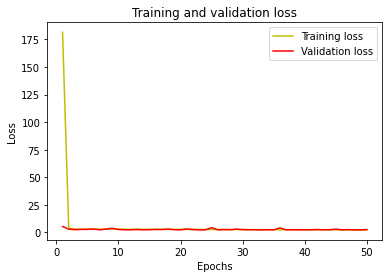

In [361]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

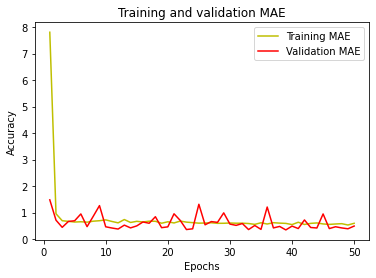

In [362]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [363]:
pred=model.predict(X_test[:5])
print('pred values are :',pred)
print('real values are :',y_test[:5])

pred values are : [[47.435677]
 [54.186615]
 [54.30591 ]
 [15.981825]
 [21.54378 ]]
real values are : 15835    47.854477
11979    54.757010
7055     55.235299
11305    16.069074
9220     21.718770
Name: Processor_pct_Processor_time, dtype: float64


In [367]:
pred=model.predict(X_test)

In [364]:
MSE,MAE=model.evaluate(X_test,y_test)
print('MSE:',MSE)
print('MAE :',MAE)

233/233 [==============================] - 0s 1ms/step - loss: 2.2822 - mae: 0.4676
MSE: 2.2821831703186035
MAE : 0.46761274337768555


In [369]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.994218915651011

## w_10_net_data




In [396]:
w10_net.head()

,ts,Bytes_Received_sec,Bytes_Sent_sec,Packets_Received_sec,Packets_sec,Packets_Sent_sec,Bytes_Total_sec
0,1554206309,2610.579105,221.7209659,4.406378726,8.512322539,4.105943813,2832.300071
1,1554206319,2779.068663,210.6203615,4.500435074,8.400812138,3.900377064,2989.689025
2,1554206329,2731.098716,209.8086341,4.483090473,8.36843555,3.885345077,2940.90735
3,1554206339,2863.61556,262.6636373,4.81583445,9.431009131,4.615174681,3126.279197
4,1554206349,2818.654327,210.484576,4.497533675,8.395396194,3.897862518,3029.138903


In [397]:
w10_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ts                    24871 non-null  int64 
 1   Bytes_Received_sec    24871 non-null  object
 2   Bytes_Sent_sec        24871 non-null  object
 3   Packets_Received_sec  24871 non-null  object
 4   Packets_sec           24871 non-null  object
 5   Packets_Sent_sec      24871 non-null  object
 6   Bytes_Total_sec       24871 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [398]:
dict=pd.DataFrame(w10_net.dtypes,columns=['Data types'])
dict['null']=w10_net.isnull().sum()
dict['unique vals']=w10_net.nunique()
dict['count']=w10_net.count()
dict

,Data types,null,unique vals,count
ts,int64,0,24871,24871
Bytes_Received_sec,object,0,24861,24871
Bytes_Sent_sec,object,0,24159,24871
Packets_Received_sec,object,0,24716,24871
Packets_sec,object,0,24764,24871
Packets_Sent_sec,object,0,23998,24871
Bytes_Total_sec,object,0,24862,24871


In [455]:
#changing data types from stirng to float
w10_net['Bytes_Received_sec'] =pd.to_numeric(w10_net['Bytes_Received_sec'],errors='coerce')
w10_net['Bytes_Sent_sec'] =pd.to_numeric(w10_net['Bytes_Sent_sec'],errors='coerce')
w10_net['Packets_Received_sec'] =pd.to_numeric(w10_net['Packets_Received_sec'],errors='coerce')
w10_net['Packets_sec'] =pd.to_numeric(w10_net['Packets_sec'],errors='coerce')
w10_net['Packets_Sent_sec'] =pd.to_numeric(w10_net['Packets_Sent_sec'],errors='coerce')
w10_net['Bytes_Total_sec'] =pd.to_numeric(w10_net['Bytes_Total_sec'],errors='coerce')

In [400]:
w10_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ts                    24871 non-null  int64  
 1   Bytes_Received_sec    24862 non-null  float64
 2   Bytes_Sent_sec        24862 non-null  float64
 3   Packets_Received_sec  24862 non-null  float64
 4   Packets_sec           24862 non-null  float64
 5   Packets_Sent_sec      24862 non-null  float64
 6   Bytes_Total_sec       24862 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.3 MB


In [402]:
w10_net.dropna(axis=0,inplace=True)

In [403]:
y=w10_net['Bytes_Total_sec']
train=w10_net.iloc[:,:-1]

In [405]:
X=w10_net.iloc[:,:-1]
y=w10_net['Bytes_Total_sec']

In [406]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [407]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [408]:
X_train.shape

(17403, 6)

In [409]:
model=keras.Sequential([keras.layers.Dense(100,input_dim=6,activation='relu'),
                         keras.layers.Dense(80,activation='relu'),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(40,activation='relu'),
                         keras.layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [410]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 100)               700       
                                                                 
 dense_84 (Dense)            (None, 80)                8080      
                                                                 
 dense_85 (Dense)            (None, 60)                4860      
                                                                 
 dense_86 (Dense)            (None, 40)                2440      
                                                                 
 dense_87 (Dense)            (None, 1)                 41        
                                                                 
Total params: 16,121
Trainable params: 16,121
Non-trainable params: 0
_________________________________________________________________


In [412]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
436/436 [==============================] - 1s 2ms/step - loss: 11387192.0000 - mae: 906.1478 - val_loss: 28451820.0000 - val_mae: 1646.8658
Epoch 2/100
436/436 [==============================] - 1s 2ms/step - loss: 6918856.5000 - mae: 957.2972 - val_loss: 2216888.7500 - val_mae: 623.7790
Epoch 3/100
436/436 [==============================] - 1s 2ms/step - loss: 56487896.0000 - mae: 1525.6383 - val_loss: 2045246.7500 - val_mae: 627.4944
Epoch 4/100
436/436 [==============================] - 1s 2ms/step - loss: 2393176.5000 - mae: 661.3172 - val_loss: 1878436.2500 - val_mae: 591.1855
Epoch 5/100
436/436 [==============================] - 1s 2ms/step - loss: 20253964.0000 - mae: 1005.7360 - val_loss: 4407511.5000 - val_mae: 847.5725
Epoch 6/100
436/436 [==============================] - 1s 3ms/step - loss: 3659373.0000 - mae: 725.6221 - val_loss: 1868303.0000 - val_mae: 767.5097
Epoch 7/100
436/436 [==============================] - 2s 3ms/step - loss: 3886195.7500 - mae: 726.

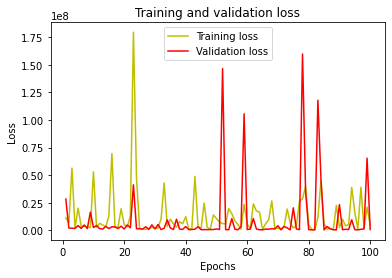

In [413]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

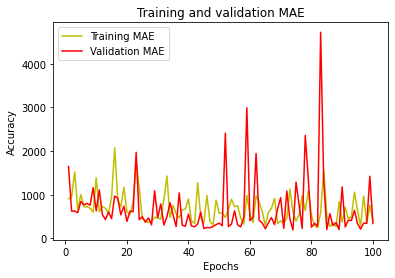

In [414]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [415]:
pred=model.predict(X_test[:5])
print('pred values are :',pred)
print('real values are :',y_test[:5])

pred values are : [[4702.591 ]
 [5077.9976]
 [5934.6504]
 [4910.579 ]
 [4779.2627]]
real values are : 12915    4918.908766
13296    5321.200639
4794     6062.304612
12061    5017.058218
16765    4971.205916
Name: Bytes_Total_sec, dtype: float64


In [416]:
pred=model.predict(X_test)

In [417]:
MSE,MAE=model.evaluate(X_test,y_test)
print('MSE:',MSE)
print('MAE :',MAE)

234/234 [==============================] - 0s 1ms/step - loss: 1064369.8750 - mae: 354.3750
MSE: 1064369.875
MAE : 354.3749694824219


In [418]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9999890152757295

## w_7_cpu_data

In [370]:
w7_cpu.head()

,ts,Processor_pct_DPC_Time,Processor_pct_Privileged_Time,Process_pct_Privileged_Time,Process_Thread_Count,Processor_pct_Processor_time
0,1554185566,0.208333333,7.708333333,97.5,13414,9.791666667
1,1554185581,0,0.104166667,99.89583333,13390,0.208333333
2,1554185596,0,0,99.79166667,13392,0.208333333
3,1554185611,0,0.208333333,99.79166667,12877,0.3125
4,1554185626,0,0,99.79166667,12849,0.208333333


In [371]:
w7_cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22387 entries, 0 to 22386
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ts                             22387 non-null  int64 
 1   Processor_pct_DPC_Time         22387 non-null  object
 2   Processor_pct_Privileged_Time  22387 non-null  object
 3   Process_pct_Privileged_Time    22387 non-null  object
 4   Process_Thread_Count           22387 non-null  int64 
 5   Processor_pct_Processor_time   22387 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [372]:
dict=pd.DataFrame(w7_cpu.dtypes,columns=['Data types'])
dict['null']=w7_cpu.isnull().sum()
dict['unique vals']=w7_cpu.nunique()
dict['count']=w7_cpu.count()
dict

,Data types,null,unique vals,count
ts,int64,0,22387,22387
Processor_pct_DPC_Time,object,0,794,22387
Processor_pct_Privileged_Time,object,0,2859,22387
Process_pct_Privileged_Time,object,0,2337,22387
Process_Thread_Count,int64,0,3931,22387
Processor_pct_Processor_time,object,0,3216,22387


In [377]:
#changing data types from stirng to float
w7_cpu['Processor_pct_DPC_Time'] =pd.to_numeric(w7_cpu['Processor_pct_DPC_Time'],errors='coerce')
w7_cpu['Processor_pct_Privileged_Time'] =pd.to_numeric(w7_cpu['Processor_pct_Privileged_Time'],errors='coerce')
w7_cpu['Process_pct_Privileged_Time'] =pd.to_numeric(w7_cpu['Process_pct_Privileged_Time'],errors='coerce')
w7_cpu['Processor_pct_Processor_time'] =pd.to_numeric(w7_cpu['Processor_pct_Processor_time'],errors='coerce')

In [378]:
w7_cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22387 entries, 0 to 22386
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ts                             22387 non-null  int64  
 1   Processor_pct_DPC_Time         22381 non-null  float64
 2   Processor_pct_Privileged_Time  22381 non-null  float64
 3   Process_pct_Privileged_Time    22377 non-null  float64
 4   Process_Thread_Count           22387 non-null  int64  
 5   Processor_pct_Processor_time   22381 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.0 MB


In [379]:
w7_cpu.dropna(axis=0,inplace=True)

In [382]:
X=w7_cpu.iloc[:,:-1]
y=w7_cpu['Processor_pct_Processor_time']

In [383]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [384]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [386]:
X_train.shape

(15663, 5)

In [387]:
model=keras.Sequential([keras.layers.Dense(100,input_dim=5,activation='relu'),
                         keras.layers.Dense(80,activation='relu'),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(40,activation='relu'),
                         keras.layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [388]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 100)               600       
                                                                 
 dense_79 (Dense)            (None, 80)                8080      
                                                                 
 dense_80 (Dense)            (None, 60)                4860      
                                                                 
 dense_81 (Dense)            (None, 40)                2440      
                                                                 
 dense_82 (Dense)            (None, 1)                 41        
                                                                 
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
_________________________________________________________________


In [389]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
392/392 [==============================] - 2s 3ms/step - loss: 88.3866 - mae: 4.1471 - val_loss: 4.6058 - val_mae: 0.9733
Epoch 2/50
392/392 [==============================] - 1s 2ms/step - loss: 4.8132 - mae: 0.9926 - val_loss: 3.3709 - val_mae: 0.9415
Epoch 3/50
392/392 [==============================] - 1s 2ms/step - loss: 3.8897 - mae: 0.8862 - val_loss: 2.7056 - val_mae: 0.7844
Epoch 4/50
392/392 [==============================] - 1s 2ms/step - loss: 3.1943 - mae: 0.7516 - val_loss: 3.2404 - val_mae: 1.0502
Epoch 5/50
392/392 [==============================] - 1s 2ms/step - loss: 2.7142 - mae: 0.7365 - val_loss: 1.7924 - val_mae: 0.5561
Epoch 6/50
392/392 [==============================] - 1s 2ms/step - loss: 2.4382 - mae: 0.6905 - val_loss: 2.5913 - val_mae: 1.0167
Epoch 7/50
392/392 [==============================] - 1s 2ms/step - loss: 2.0362 - mae: 0.6215 - val_loss: 2.1190 - val_mae: 0.8918
Epoch 8/50
392/392 [==============================] - 1s 2ms/step - loss: 1

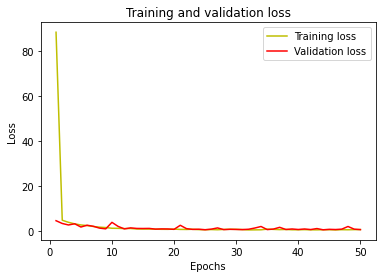

In [390]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

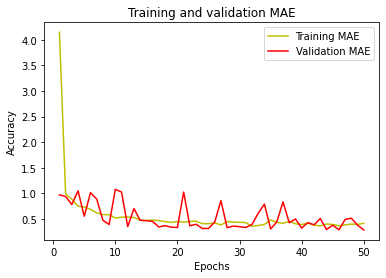

In [391]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [392]:
pred=model.predict(X_test[:5])
print('pred values are :',pred)
print('real values are :',y_test[:5])

pred values are : [[18.222292 ]
 [58.525467 ]
 [25.40638  ]
 [ 5.6807146]
 [68.406944 ]]
real values are : 1620     18.119670
21317    58.645833
7044     25.416667
15471     5.104167
21599    68.437500
Name: Processor_pct_Processor_time, dtype: float64


In [393]:
pred=model.predict(X_test)

In [394]:
MSE,MAE=model.evaluate(X_test,y_test)
print('MSE:',MSE)
print('MAE :',MAE)

210/210 [==============================] - 0s 1ms/step - loss: 0.8660 - mae: 0.2764
MSE: 0.8660167455673218
MAE : 0.27641645073890686


In [395]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9978344214066517

In [375]:
y=w7_cpu['Processor_pct_Processor_time']
train=w7_cpu.iloc[:,:-1]

In [376]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train = scaler.fit_transform(train)

## w_7_net_data

In [419]:
w7_net.head()

,ts,Bytes_Received_sec,Bytes_Sent_sec,Packets_Received_sec,Packets_sec,Packets_Sent_sec,Bytes_Total_sec
0,1554185566,189.9302187,66.24541874,1.000686084,1.601097734,0.60041165,256.1756374
1,1554185581,201.2512159,77.6607044,1.13324633,1.866523367,0.733277037,278.9119203
2,1554185596,69.26658124,43.99994573,0.399999507,0.733332429,0.333332922,113.266527
3,1554185611,344.3296352,123.2653428,1.93331257,3.133299682,1.199987112,467.594978
4,1554185626,195.2649965,71.93271807,1.066657543,1.733318508,0.666660964,267.1977146


In [420]:
w7_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22387 entries, 0 to 22386
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ts                    22387 non-null  int64 
 1   Bytes_Received_sec    22387 non-null  object
 2   Bytes_Sent_sec        22387 non-null  object
 3   Packets_Received_sec  22387 non-null  object
 4   Packets_sec           22387 non-null  object
 5   Packets_Sent_sec      22387 non-null  object
 6   Bytes_Total_sec       22387 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [421]:
dict=pd.DataFrame(w7_net.dtypes,columns=['Data types'])
dict['null']=w7_net.isnull().sum()
dict['unique vals']=w7_net.nunique()
dict['count']=w7_net.count()
dict

,Data types,null,unique vals,count
ts,int64,0,22387,22387
Bytes_Received_sec,object,0,21535,22387
Bytes_Sent_sec,object,0,20894,22387
Packets_Received_sec,object,0,21454,22387
Packets_sec,object,0,21825,22387
Packets_Sent_sec,object,0,20728,22387
Bytes_Total_sec,object,0,21879,22387


In [422]:
#changing data types from stirng to float
w7_net['Bytes_Received_sec'] =pd.to_numeric(w7_net['Bytes_Received_sec'],errors='coerce')
w7_net['Bytes_Sent_sec'] =pd.to_numeric(w7_net['Bytes_Sent_sec'],errors='coerce')
w7_net['Packets_Received_sec'] =pd.to_numeric(w7_net['Packets_Received_sec'],errors='coerce')
w7_net['Packets_sec'] =pd.to_numeric(w7_net['Packets_sec'],errors='coerce')
w7_net['Packets_Sent_sec'] =pd.to_numeric(w7_net['Packets_Sent_sec'],errors='coerce')
w7_net['Bytes_Total_sec'] =pd.to_numeric(w7_net['Bytes_Total_sec'],errors='coerce')

In [423]:
w7_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22387 entries, 0 to 22386
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ts                    22387 non-null  int64  
 1   Bytes_Received_sec    22381 non-null  float64
 2   Bytes_Sent_sec        22381 non-null  float64
 3   Packets_Received_sec  22381 non-null  float64
 4   Packets_sec           22381 non-null  float64
 5   Packets_Sent_sec      22381 non-null  float64
 6   Bytes_Total_sec       22381 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB


In [434]:
y=w7_net['Bytes_Total_sec']
train=w7_net.iloc[:,:-1]

In [435]:
w7_net.dropna(axis=0,inplace=True)

In [436]:
y=w7_net['Bytes_Total_sec']
train=w7_net.iloc[:,:-1]

In [437]:
X=w7_net.iloc[:,:-1]
y=w7_net['Bytes_Total_sec']

In [438]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [439]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [440]:
X_train.shape

(15666, 6)

In [441]:
model=keras.Sequential([keras.layers.Dense(100,input_dim=6,activation='relu'),
                         keras.layers.Dense(80,activation='relu'),
                         keras.layers.Dense(60,activation='relu'),
                         keras.layers.Dense(40,activation='relu'),
                         keras.layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [442]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 100)               700       
                                                                 
 dense_94 (Dense)            (None, 80)                8080      
                                                                 
 dense_95 (Dense)            (None, 60)                4860      
                                                                 
 dense_96 (Dense)            (None, 40)                2440      
                                                                 
 dense_97 (Dense)            (None, 1)                 41        
                                                                 
Total params: 16,121
Trainable params: 16,121
Non-trainable params: 0
_________________________________________________________________


In [443]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
392/392 [==============================] - 2s 3ms/step - loss: 1432913408.0000 - mae: 2887.4878 - val_loss: 141201584.0000 - val_mae: 2710.1162
Epoch 2/100
392/392 [==============================] - 1s 2ms/step - loss: 1115784320.0000 - mae: 3628.1362 - val_loss: 123265784.0000 - val_mae: 3623.6550
Epoch 3/100
392/392 [==============================] - 1s 2ms/step - loss: 791153344.0000 - mae: 3304.6335 - val_loss: 175730608.0000 - val_mae: 3217.3662
Epoch 4/100
392/392 [==============================] - 1s 2ms/step - loss: 623993472.0000 - mae: 2995.4900 - val_loss: 130382368.0000 - val_mae: 2296.1594
Epoch 5/100
392/392 [==============================] - 1s 2ms/step - loss: 551729408.0000 - mae: 2437.9719 - val_loss: 152621568.0000 - val_mae: 2283.9553
Epoch 6/100
392/392 [==============================] - 1s 2ms/step - loss: 446945344.0000 - mae: 2276.4070 - val_loss: 105807056.0000 - val_mae: 1899.8151
Epoch 7/100
392/392 [==============================] - 1s 2ms/step -

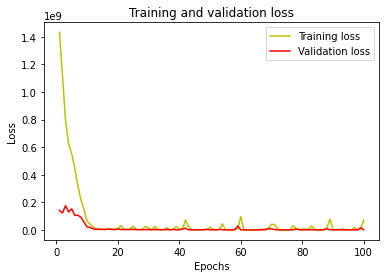

In [444]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

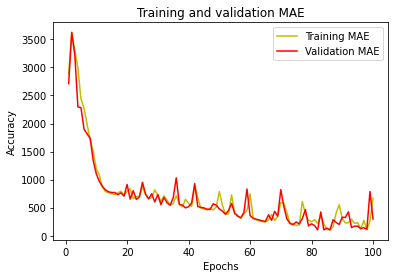

In [445]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [447]:
pred=model.predict(X_test[:5])
print('pred values are :',pred)
print('real values are :',y_test[:5])

pred values are : [[ 452.45102]
 [4045.389  ]
 [3473.7847 ]
 [ 415.9191 ]
 [ 461.25082]]
real values are : 8302      191.402110
3229     4451.301158
1322     3609.111192
20506     156.594786
4703       58.400565
Name: Bytes_Total_sec, dtype: float64


In [448]:
pred=model.predict(X_test)

In [449]:
MSE,MAE=model.evaluate(X_test,y_test)
print('MSE:',MSE)
print('MAE :',MAE)

210/210 [==============================] - 0s 1ms/step - loss: 4363690.5000 - mae: 324.9238
MSE: 4363690.5
MAE : 324.923828125


In [450]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9934435379094781

In [452]:
#linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score